In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('classic')
plt.rcParams['figure.facecolor'] = 'white'

# Homework 3

**Instructions:** Complete the notebook below. Download the completed notebook in HTML format. Upload assignment using Canvas.

## Exercise: Income and Growth Across Countries

The data file `cross_country_gdp_per_capita.csv` contains annual data on GDP per capita for over 100 countries and is available here: https://raw.githubusercontent.com/letsgoexploring/economic-data/master/cross-country-production/csv/cross_country_gdp_per_capita.csv. The data are was constructed from the Penn World Table (https://www.rug.nl/ggdc/productivity/pwt/).

In this exercise, you will:

1. Analyze some basic facts about GDP per capita across the world.
2. Compute the average annual growth rate of GDP per capita for each country in the data.
3. Compute a linear regression of average GDP per capita growth on GDP per capita in the initial year.

Follow the instructions in the following cells.

### Part (a)

In [2]:
# Create a variable called 'data' that stores the data in the file 'cross_country_gdp_per_capita.csv' in a DataFrame
# Make sure that 'Year', the left-most column of the data, is set to be the index column
data = pd.read_csv('https://raw.githubusercontent.com/letsgoexploring/economic-data/master/cross-country-production/csv/cross_country_gdp_per_capita.csv', index_col='year')
# Print the first 5 rows of data
data.head()

,Algeria - DZA,Argentina - ARG,Australia - AUS,Austria - AUT,Bangladesh - BGD,Barbados - BRB,Belgium - BEL,Benin - BEN,Bolivia (Plurinational State of) - BOL,Botswana - BWA,...,Tunisia - TUN,Turkey - TUR,U.R. of Tanzania: Mainland - TZA,Uganda - UGA,United Kingdom - GBR,United States - USA,Uruguay - URY,Venezuela (Bolivarian Republic of) - VEN,Zambia - ZMB,Zimbabwe - ZWE
year,,,,,,,,,,,,,,,,,,,,,
1960-01-01,10509.008358,3163.732710,15646.139353,10123.029724,1614.258962,8077.843086,10413.567949,1613.682642,1793.725019,501.963539,...,1672.383999,5105.784826,1124.951944,860.620171,12569.280813,19180.187484,7424.589274,6881.015186,1757.650342,2414.726327
1961-01-01,8734.654889,3225.229409,15666.440016,10675.157983,1594.635939,8591.699053,10966.940259,1620.385825,1806.270764,542.991691,...,1715.566809,5062.252401,1133.652078,860.173890,12817.946324,19342.103029,7495.573036,6781.865640,1785.884491,2480.505976
1962-01-01,4595.165489,3247.774783,16218.777695,11039.562197,1679.000245,9219.070754,11832.121657,1551.691450,1812.806730,596.211469,...,1733.662454,5257.709264,1212.530695,858.673399,12946.663809,20213.129847,7569.820959,6824.167909,1770.477253,2387.665504
1963-01-01,5320.490300,3084.691110,17097.551206,11412.303692,1736.151714,9026.570727,12284.827489,1601.555862,1906.996349,616.322979,...,1874.419709,5619.228307,1270.920176,848.627413,13379.151279,20788.538117,7316.025332,7192.137422,1824.180363,2363.511866
1964-01-01,5413.859929,3176.120812,17574.573982,11866.055096,1682.423109,8914.135597,13017.674457,1651.505927,1970.671432,646.745990,...,1886.067528,5655.940421,1429.397151,889.057113,14067.603724,21691.511003,7491.037965,7710.422273,2015.107433,2226.032210


In [3]:
# Each column contains data for a specific country. Print the number of countries (e.g., the length of data.columns)
print(len(data.columns))

104


In [4]:
# Each column contains data for a specific year. Print the number of years (e.g., the length of data.index)
print(len(data.index))

60


In [5]:
# Print the values of the initial year and the final year in the data
print(data.index.min(), data.index.max())


1960-01-01 2019-01-01


In [6]:
# Create a variable called 'data_initial' that is equal to the first row of the data DataFrame
data_initial = data.iloc[0]

# Create a variable called 'data_final' that is equal to the last row of the data DataFrame
data_final = data.iloc[-1]

In [7]:
# Use the sort_values() method of data_initial to sort the Series in ascending order.

data_initial = data_initial.sort_values()

# Print the name and GDP per capita of the countries with the 10 lowest GDPs per capita in the initial year of the data
print(data_initial.head(10))

Malta - MLT          332.605250
Ethiopia - ETH       500.025217
Botswana - BWA       501.963539
Mozambique - MOZ     560.160467
Egypt - EGY          667.223190
El Salvador - SLV    675.555918
Burundi - BDI        690.483404
Mali - MLI           717.298249
Nepal - NPL          750.282764
Uganda - UGA         860.620171
Name: 1960-01-01, dtype: float64


In [8]:
# Use the sort_values() method of data_final to sort the Series in ascending order.
data_final = data_final.sort_values()

# Print the name and GDP per capita of the countries with the 10 lowest GDPs per capita in the final year of the data
print(data_final.head(10))

Venezuela (Bolivarian Republic of) - VEN     251.176696
Burundi - BDI                                794.957690
Central African Republic - CAF               980.695287
D.R. of the Congo - COD                     1019.858187
Malawi - MWI                                1166.743042
Niger - NER                                 1211.209949
Mozambique - MOZ                            1231.471703
Madagascar - MDG                            1543.241302
Haiti - HTI                                 1569.443734
Uganda - UGA                                2097.404068
Name: 2019-01-01, dtype: float64


In [9]:
# Print the names of the countries that are among the 10 with lowest GDPs per capita in BOTH the initial year and 
# the final year. If you can't think of an efficient way to do it, just print maunally. E.g.:
#     print('Country 1')
#     print('Country 2')
#     Etc.

for country in data_initial.head(10).index:
    if country in data_final.head(10).index:
        print(country)


Mozambique - MOZ
Burundi - BDI
Uganda - UGA


In [10]:
# Print the name and GDP per capita of the countries with the 10 highest GDPs per capita in the initial year of the data

print(data_initial.tail(10))

Iceland - ISL           12402.693199
United Kingdom - GBR    12569.280813
Sweden - SWE            13001.330760
Denmark - DNK           13162.048275
New Zealand - NZL       14052.787169
Canada - CAN            14982.252586
Australia - AUS         15646.139353
Luxembourg - LUX        16148.062133
United States - USA     19180.187484
Switzerland - CHE       24761.019339
Name: 1960-01-01, dtype: float64


In [11]:
# Print the name and GDP per capita of the countries with the 10 highest GDPs per capita in the final year of the data
print(data_final.tail(10))


Australia - AUS                53768.702289
Denmark - DNK                  54055.919167
China, Hong Kong SAR - HKG     54879.957099
Netherlands - NLD              55576.780284
United States - USA            62498.409698
Norway - NOR                   72225.840685
Switzerland - CHE              75036.009994
Singapore - SGP                82211.559003
Luxembourg - LUX               91273.419648
Ireland - IRL                 101665.951527
Name: 2019-01-01, dtype: float64


In [12]:
# Print the names of the countries that are among the 10 with highest GDPs per capita in BOTH the initial year
# and the final year

for country in data_initial.tail(10).index:
    if country in data_final.tail(10).index:
        print(country)


Denmark - DNK
Australia - AUS
Luxembourg - LUX
United States - USA
Switzerland - CHE


### Part (b)

Let $y_t$ denotes GDP per capita for some country in some year $t$ and let $g$ denotes the average annual growth in GDP per capita between years 0 and $T$. $g$ is defined by:
\begin{align}
y_T & = (1+g)^T y_0
\end{align}
which implies:
\begin{align}
g & = \left(\frac{y_T}{y_0}\right)^{1/T} - 1
\end{align}
We can use this equation to compute the aveage growth rate of GDP per capita for each country in our data. Note that for our data, $T$ is equal to `len(data.index)-1`.

In [13]:


# Create a variable called 'growth_rates' that contains the average growth rate of each country in the data.
# NOTE: You do not need to re-sort the variables data_initial and data_final. If their indices don't align,
# Pandas will automatically sort their indices alphabetically.

T = len(data.index) - 1
growth_rates = (data_final / data_initial) ** (1 / T) - 1


# Use the sort_values() method of growth_rates to sort the Series in ascending order.
growth_rates = growth_rates.sort_values()


In [14]:
# Print the average of the average growth rate of GDP per capita for all countries rounded to 4 decimal places
print(round(growth_rates.mean(), 4))

0.0231


In [15]:
# Print the standard deviation of the growth rate of GDP per capita for all countries rounded to 4 decimal places
print(round(growth_rates.std(), 4))

0.0175


In [16]:
# Print the name and growth rates of the countries with the 10 lowest growth rates of GDP per capita
print(growth_rates.head(10))

Venezuela (Bolivarian Republic of) - VEN   -0.054563
D.R. of the Congo - COD                    -0.017165
Niger - NER                                -0.007383
Central African Republic - CAF             -0.006159
Gambia - GMB                               -0.001763
Haiti - HTI                                 0.000439
Nicaragua - NIC                             0.000889
Madagascar - MDG                            0.001119
Algeria - DZA                               0.001826
Ghana - GHA                                 0.002144
dtype: float64


In [17]:
# Print the name and growth rates of the countries with the 10 highest growth rates of GDP per capita
print(growth_rates.tail(10))


China - CHN                0.045472
Thailand - THA             0.046554
Ireland - IRL              0.046744
Egypt - EGY                0.050308
Taiwan - TWN               0.051162
Romania - ROU              0.051579
Republic of Korea - KOR    0.060488
Botswana - BWA             0.061024
Singapore - SGP            0.069868
Malta - MLT                0.084268
dtype: float64


In [18]:
# Print the names of the countries that were BOTH among the 10 with lowest GDPs per capita in the initial year and 
# among the 10 with the highest growth of GDP per capita.
# If you can't think of an efficient way to do it, just print maunally. E.g.:
#     print('Country 1')
#     print('Country 2')
#     Etc.

for country in data_initial.head(10).index:
    if country in growth_rates.tail(10).index:
        print(country)



Malta - MLT
Botswana - BWA
Egypt - EGY


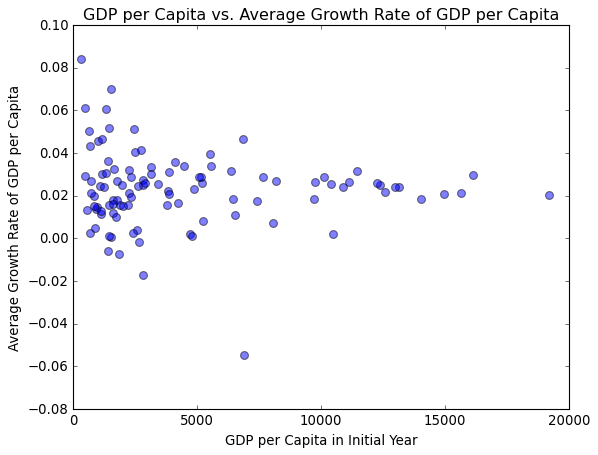

In [19]:
# Use the sort_index() method of data_initial to alphabetize the index [e.g., data_initial = data_initial.sort_index()]

data_initial = data_initial.sort_index()


# Use the sort_index() method of growth_rates to alphabetize the index
growth_rates = growth_rates.sort_index()

# Construct a scatter plot with:
#     1. GDP per capita in the initial year on the horizontal axis
#     2. Average growth rate of GDP per capita on the vertical axis
#     3. Size of scatter plot markers at least 50
#     4. Opacity of scatter plot markers no greater than 0.5
#     5. x-axis limit: [0,20000]
#     6. Suitable title and labels for the axes

plt.scatter(data_initial, growth_rates, s=50, alpha=0.5)
plt.xlim(0, 20000)
plt.title('GDP per Capita vs. Average Growth Rate of GDP per Capita')
plt.xlabel('GDP per Capita in Initial Year')
plt.ylabel('Average Growth Rate of GDP per Capita')
plt.show()








**Question**

1. Describe in words the relationship between GDP per capita in the initial year and average growth of GDP per capita. How is the relationship different for low income countries and high income countries?


**Answer**

1.  Based on the scatterplot, across countries, poorer countries do not systematically grow faster than richer ones in this sample. For low-income countries, outcomes are highly heterogeneous: some “take-off” cases grow very fast (e.g., Malta, Botswana, Singapore, Korea, China), while others stagnate or even shrink (e.g., D.R. Congo, Niger, Central African Republic, Haiti, Venezuela). By contrast, high-income countries’ growth rates are more tightly clustered around modest 2–3% per year, with less dispersion and few extremes.

### Part (c)

In this part you will use OLS to estimate the relationship between GDP per capita in the initial year and average growth of GDP per capita.

\begin{align}
g_i & = \beta_0 + \beta_{\text{1}}y_i + \epsilon_i,
\end{align}

where $g_i$ is the average annual growth rate of country $i$, $y_i$ is country $i$'s initial GDP per capita, and $\epsilon_i$ is the residual of the regression.

In [20]:


# Create a variable called 'y' that is equal to the average growth rates of the countries

y = growth_rates

# Create a variable called x' that is equal to the GDP per capita of the countries in the initial year

x = data_initial

# Use the Statsmodels function add_constant() to add a constant column to the variable x

x = sm.add_constant(x)
# Create a variable called 'model' equal to the output of the Statsmodels OLS function regressing y upon x

model = sm.OLS(y, x)

# Create a variable called 'results' that stores the fitted model (i.e., the output of the fit() method of model

results = model.fit()

# Print the summary of results generated by the summary() method of results

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.6262
Date:                Mon, 20 Oct 2025   Prob (F-statistic):              0.431
Time:                        21:32:37   Log-Likelihood:                 273.81
No. Observations:                 104   AIC:                            -543.6
Df Residuals:                     102   BIC:                            -538.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0244      0.002      9.993      0.0

**Questions**

1. Interpret the estimate for the coefficient on $y_i$.
2. Interpret the estimate for the constant. Where did we see this number earlier?
3. Interpret the R-squared of the regression.

**Answers**

1.  Holding other factors constant, a country with $1 higher initial GDP per capita is predicted to have about 2.9 x 10^-7 lower annual growth

2.  The constant coefficient is 0.0244. This is the predicted average annual growth rate (~2.44%) for a (hypothetical) country with initial GDP per capita equal to zero. 
This intercept is very close to the sample mean growth rate across countries—the same number.

3.  R^2 = 0.006, Initial income explains about 0.6% of the cross-country variation in average growth—i.e., essentially no explanatory power for this simple, unconditional regression.

## Exercise: Income and Growth Across US States

The data file `state_income_data.csv` contains annual data on income per capita for the 48 continental states, Washington D.C., and the United States as a whole and is available here: https://raw.githubusercontent.com/letsgoexploring/economic-data/master/us-convergence/csv/state_income_data.csv. 

In this exercise, you will:

1. Analyze some basic facts about income per capita among US states.
2. Compute the average annual growth rate of income per capita for each state in the data.
3. Compute a linear regression of average income per capita growth on income per capita in the initial year.

Follow the instructions in the following cells.

### Part (a)

In [21]:
"""The data file `state_income_data.csv` contains annual data on income per capita for the 48 continental states, Washington D.C., and the United States as a whole and is available here: https://raw.githubusercontent.com/letsgoexploring/economic-data/master/us-convergence/csv/state_income_data.csv. 
"""


# Create a variable called 'state_df' that stores the data in the file 'cross_country_gdp_pc.csv' in a DataFrame
# Make sure that 'Year', the left-most column of the data, is set to be the index column

state_df = pd.read_csv("https://raw.githubusercontent.com/letsgoexploring/economic-data/master/us-convergence/csv/state_income_data.csv", index_col=0)
state_df.index.name = 'Year'
# Print the first 5 rows of state_df
state_df.head()

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,TN,TX,UT,United States,VA,VT,WA,WI,WV,WY
Year,,,,,,,,,,,,,,,,,,,,,
1840-01-01,NaN,1032.467532,1324.675325,NaN,NaN,NaN,1772.727273,NaN,1324.675325,1344.155844,...,915.584416,NaN,NaN,1266.233766,1051.948052,1266.233766,NaN,1558.441558,1051.948052,NaN
1880-01-01,NaN,1212.121212,1341.991342,5129.870130,4199.134199,4783.549784,3160.173160,NaN,2337.662338,1038.961039,...,1125.541126,1298.701299,1753.246753,2056.277056,1103.896104,2251.082251,3030.303030,2034.632035,1168.831169,3333.333333
1900-01-01,NaN,1449.350649,1472.727273,4675.324675,4231.168831,4090.909091,3646.753247,NaN,2922.077922,1566.233766,...,1425.974026,1963.636364,2664.935065,2641.558442,1542.857143,2758.441558,4231.168831,2501.298701,1846.753247,5540.259740
1929-01-01,NaN,3634.085213,3451.811347,6812.485760,11323.763955,7188.425609,11722.488038,15083.162452,11745.272272,5912.508544,...,4249.259512,5399.863295,6242.879927,7963.089542,4955.570745,7177.033493,8430.166325,7632.718159,5228.981545,7655.502392
1930-01-01,NaN,3109.849829,2648.693390,6125.103465,10512.001892,6787.276812,10961.333806,15537.424619,10145.441646,5533.877261,...,3795.672224,4812.581294,5841.314887,7343.029443,4576.090812,6763.627764,7768.712309,6917.346577,4812.581294,6881.873005


The DataFrame method `dropna()` returns a DataFrame that omits rows that contain missing (NaN means *not a number*) values. The following command will remove the rows with missing values from the DataFrame `df`:

    df =  df.dropna()
    
The DataFrame method `drop()` returns a DataFrame that omits rows or columns with a given label. The following command will remove the column named `'LABEL'` from the DataFrame `df`:   
   
    df = df.drop('LABEL',axis=1)
    
The argument `axis=1` means to look among the columns for `'LABEL'`. If we had wanted to remove a row with the index value `'LABEL'`, then the axis argument would have been: `axis=0`.

In [22]:
# Remove the rows with missing data from state_df
state_df = state_df.dropna()

# Remove the column named 'United States' from state_df
state_df = state_df.drop(columns=['United States'])

# Set state_df equal to itself divided by 1000 so that its units are in thousands of dollars
state_df = state_df / 1000

# Print the first 5 rows of state_df
state_df.head()

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
Year,,,,,,,,,,,,,,,,,,,,,
1950-01-01,23.772038,7.535875,6.961870,11.545715,15.965560,12.988930,15.727757,19.901599,17.072571,11.078311,...,10.643706,8.528085,11.414514,11.406314,10.881509,9.749897,14.735547,12.423124,8.618286,14.694547
1951-01-01,26.041348,8.200613,7.427259,12.840735,16.584992,14.402757,16.776417,19.502297,16.600306,11.026034,...,11.638591,8.728943,11.669219,12.251149,11.577335,10.444104,14.969372,13.399694,9.027565,15.490046
1952-01-01,24.499473,8.557880,7.850369,13.390035,17.334036,14.850218,17.582418,20.269457,16.995333,11.583622,...,10.213759,9.032064,12.087912,12.471775,12.155653,10.612675,15.527623,13.653470,9.363240,14.948066
1953-01-01,23.566595,8.871867,8.061278,13.222280,17.438834,14.166729,18.078382,19.327731,17.476017,12.166282,...,11.028482,9.667584,12.203465,12.396817,12.248085,10.879750,16.122555,13.757715,9.466796,14.910389
1954-01-01,21.566460,8.598585,8.104922,13.012084,17.116121,13.859416,17.602417,19.311818,17.160330,11.995284,...,11.118479,9.578544,12.385794,12.083702,12.356322,10.985853,16.084586,13.159446,9.011200,14.257294


In [23]:
# Create a variable called 'state_growth_rates' that contains the average growth rate of each state in the data.


state_growth_rates = (state_df.iloc[-1] / state_df.iloc[0]) ** (1 / (len(state_df.index) - 1)) - 1

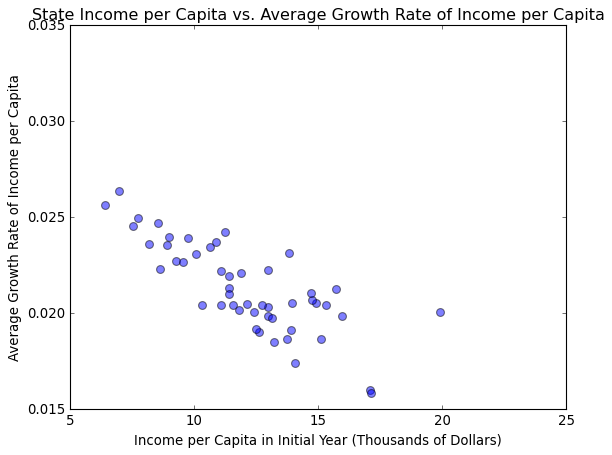

In [24]:
# Construct a scatter plot with:
#     1. Income per capita in the initial year on the horizontal axis
#     2. Average growth rate of income per capita on the vertical axis
#     3. Size of scatter plot markers at least 50
#     4. Opacity of scatter plot markers no greater than 0.5
#     5. y-axis limit: [0.015,0.035]
#     6. Suitable title and labels for the axes

plt.scatter(state_df.iloc[0], state_growth_rates, s=50, alpha=0.5)
plt.ylim(0.015, 0.035)
plt.title('State Income per Capita vs. Average Growth Rate of Income per Capita')
plt.xlabel('Income per Capita in Initial Year (Thousands of Dollars)')
plt.ylabel('Average Growth Rate of Income per Capita')
plt.show()







### Part (b)

Like you did for the country data above, use OLS to estimate the relationship between income per capita in the initial year and average growth of income per capita.

\begin{align}
g_i & = \beta_0 + \beta_{\text{1}}y_i + \epsilon_i,
\end{align}

where $g_i$ is the average annual growth rate of country $i$, $y_i$ is state $i$'s initial income per capita, and $\epsilon_i$ is the residual of the regression.

In [25]:
# Create a variable called 'y' that is equal to the average growth rates of the states
y = state_growth_rates

# Create a variable called x' that is equal to the income per capita of the states in the initial year
x = state_df.iloc[0]

# Use the Statsmodels function add_constant() to add a constant column to the variable x
x = sm.add_constant(x)

# Create a variable called 'model' equal to the output of the Statsmodels OLS function regressing y upon x
model = sm.OLS(y, x)

# Create a variable called 'results' that stores the fitted model (i.e., the output of the fit() method of model)
results = model.fit()

# Print the summary of results generated by the summary() method of results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     110.5
Date:                Mon, 20 Oct 2025   Prob (F-statistic):           3.73e-14
Time:                        21:32:37   Log-Likelihood:                 261.79
No. Observations:                  51   AIC:                            -519.6
Df Residuals:                      49   BIC:                            -515.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0293      0.001     36.507      0.0

**Questions**

1. Interpret the estimate for the coefficient on $y_i$.
2. Interpret the R-squared of the regression.
3. Why do you think that initial income and average growth are so strongly correlated in the state data but not so in the country data? (If you're not sure, referesh your knowledge about the difference between *conditional* and *unconditional* convergence: https://en.wikipedia.org/wiki/Convergence_(economics)#Types_of_Convergence)

**Answers**

1.  The estimate is -0.0007, meaning that an extra $1000 of initial income is associated with roughly 0.07 percentage points lower average annual growth

2.  The R^2 is 0.693. Initial income alone explains about 69.3% of the cross-state variation in long-run average growth — a very tight negative relationship.

3.  The US States share much-more similar structural characteristics I would assume, such as institutions, legal system, currency, national capital markets, high labor/capital mobility, federal redistribution, technology diffusion, That makes the “conditional” determinants of steady states more alike, so unconditional income–growth convergence shows up clearly in state data. Across countries, those structural conditions differ widely (savings/human capital, institutions, policies, demographics, trade barriers), so we typically see conditional rather than unconditional convergence.